In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('advertising.csv')
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36:18,0


In [5]:
data.City.value_counts()

Williamsport          3
Lisamouth             3
West Shannon          2
Benjaminchester       2
Robertfurt            2
                     ..
North Richardburgh    1
Port Dennis           1
West Tinashire        1
Meaganfort            1
Youngburgh            1
Name: City, Length: 969, dtype: int64

In [6]:
data.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


<AxesSubplot:>

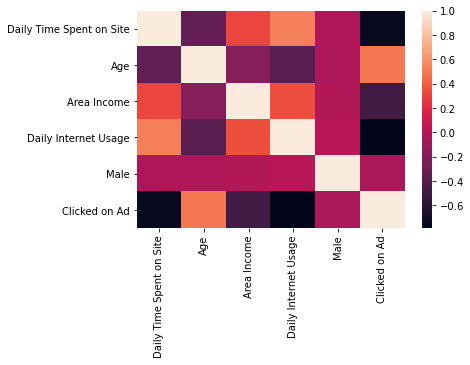

In [7]:
sns.heatmap(data.corr())

In [8]:
data.Country.value_counts().describe()

count    237.000000
mean       4.219409
std        1.837222
min        1.000000
25%        3.000000
50%        4.000000
75%        6.000000
max        9.000000
Name: Country, dtype: float64

<AxesSubplot:xlabel='City', ylabel='count'>

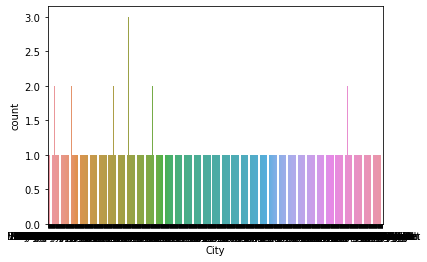

In [9]:
sns.countplot(x = data.City)

In [ ]:
sns.countplot(x = data.Country)

<AxesSubplot:xlabel='Country', ylabel='count'>

In [ ]:
data.Timestamp.dtype

In [ ]:
dates = pd.to_datetime(data.Timestamp)

In [ ]:
data['hour'] = dates.apply(lambda x:x.hour)

In [ ]:
data.head()

In [ ]:
data['min'] = dates.apply(lambda x:x.minute)

In [ ]:
data.head()

In [ ]:
X = data.drop(['Clicked on Ad', 'City', 'Ad Topic Line', 'Timestamp'],axis=1)
y = data['Clicked on Ad']

In [ ]:
X

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:, :4] = sc.fit_transform(X_train.iloc[:, :4])
X_test.iloc[:, :4] = sc.transform(X_test.iloc[:, :4])
X_train.iloc[:, 6:] = sc.fit_transform(X_train.iloc[:, 6:])
X_test.iloc[:, 6:] = sc.transform(X_test.iloc[:, 6:])

In [ ]:
X_train

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train.Country = np.array(le.fit_transform(X_train.Country))

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_test.Country = np.array(le.fit_transform(X_test.Country))

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)